In [1]:
# Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats  #for the statistical tests
from scipy import stats as stats # Alternate of above
%matplotlib inline

In [2]:
file_path = 'C://projects//alabs_python//date//input//'

In [3]:
cus_seg = pd.read_csv(file_path + "cust_seg.csv")

In [4]:
cus_seg.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


In [17]:
dis_skew_kur = pd.concat([
    cus_seg.describe().T,
    cus_seg.skew().rename('skewness'),
    cus_seg.kurtosis().rename('kurtosis')
], axis=1)

print(dis_skew_kur)

                     count      mean        std   min     25%    50%     75%  \
custid               200.0  100.5000  57.879185   1.0  50.750  100.5  150.25   
sex                  200.0    0.5450   0.499220   0.0   0.000    1.0    1.00   
AqChannel            200.0    3.4300   1.039472   1.0   3.000    4.0    4.00   
region               200.0    2.0550   0.724291   1.0   2.000    2.0    3.00   
Marital_status       200.0    1.1600   0.367526   1.0   1.000    1.0    1.00   
segment              200.0    2.0250   0.690477   1.0   2.000    2.0    2.25   
pre_usage            200.0   52.2300  10.252937  28.0  44.000   50.0   60.00   
Post_usage_1month    200.0   52.7750   9.478586  31.0  45.750   54.0   60.00   
Latest_mon_usage     200.0   63.1740  11.242137  39.6  54.000   62.4   70.80   
post_usage_2ndmonth  200.0   58.0525  10.426445  34.1  50.325   59.4   66.00   

                       max  skewness  kurtosis  
custid               200.0  0.000000 -1.200000  
sex                  

In [19]:
# Dimensions
cus_seg.shape

(200, 10)

In [21]:
# Data types / Non Null Count
cus_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [23]:
# Five Point Summary
cus_seg.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


In [25]:
### Q1: 1-sample ttest

# Population mean 50 with sample of 200 customer mean

# One Sample T- Test - Pop mean vs Sample Mean

# Defining the hypothesis
# H0 : Sample mean is less than or equal to Population mean
# Ha: Sample mean is greater than population mean


# CI: 99%, p/alpha: 0.01

In [27]:
# sample to be considered
# Exploration - No Hypothesis Testing 
var_name = 'Post_usage_1month'

# mean values to be compared
pop_mean = 50
sample = cus_seg.loc[:, var_name]
mean_sample = sample.mean()

# display the means
print('popmean: ', pop_mean, '| sample mean: ', mean_sample )

popmean:  50 | sample mean:  52.775


In [29]:
# perform the test
stats.ttest_1samp(a = sample, popmean = pop_mean)

TtestResult(statistic=4.140324966963025, pvalue=5.1209194607163335e-05, df=199)

In [31]:
# Conclusion:
# We reject null hypothesis and establish the alternate

# There is a increase in spend value in post usagew 1 month compared to last average value 50

In [33]:
# Q2.

# Set up the Hypothesis

# Ho: post compaign <= pre campaign
# Ha: post campaing > pre campaign


# Define Test and CI and Alpha value

# T- Test- Two sample dependent Test
# 1 Tail (+)

# CI - 95% . aplha - 0.05

In [35]:
# Exploration

# declare the post campaighn analysis variable for consideration

# print the means
print('pre usage mean:', cus_seg.pre_usage.mean())
print( 'post usage mean:', cus_seg.post_usage_2ndmonth.mean() )

pre usage mean: 52.23
post usage mean: 58.0525


In [37]:
pre = cus_seg.pre_usage
post =  cus_seg.post_usage_2ndmonth

In [39]:
stats.ttest_rel(pre, post)

TtestResult(statistic=-8.866832246938742, pvalue=4.295733828012836e-16, df=199)

In [41]:
# Conclude
# p_value is less than alpha (0.05)
# We establish Alternate Hypothesis and reject Null Hypothesis

# Yes the spend has significantly improved over pre campaign spends

In [43]:
#Mean(M) Mean(F)

In [45]:
# Q3

# Defining the Hypothesis
# Ho : Mean(M) = Mean(F)
# Ha: Mean(M)<> Mean(F)

# Test, CI - 97%, aplha - 0.03



In [47]:
# take the two samples
var_name = 'Post_usage_1month'
male = cus_seg.loc[ cus_seg.sex == 0, var_name ]
female = cus_seg.loc[ cus_seg.sex == 1, var_name ]

# display the mean usages
print('mean spend of male:', male.mean() )
print('mean spend of female:', female.mean() )

mean spend of male: 50.120879120879124
mean spend of female: 54.99082568807339


In [49]:
# Run the test
stats.ttest_ind(a = male, b = female)

TtestResult(statistic=-3.7340738531536797, pvalue=0.00024625461203549315, df=198.0)

In [ ]:
# Conclude
# We establish alternate hypothesis reject Null Hypothesis

# Concluded : Spends are signigicant among male and female groups

In [51]:
cus_seg['segment'].unique()

array([1, 3, 2], dtype=int64)

In [ ]:
# ANOVA (Analysis of Variance)
# Testing - to understand the difference in means among groups > 2

# Ho: Groups are having equal mean (They are from same distrubtion)
# Ha: Group are different (are not having equal mean) (They are from different distribution)

In [ ]:
# Q4
# Ho: All segments have same means
# Ha: Segement have different means

In [ ]:
# CI - 96% , alpha value - 0.04

In [20]:
# declare the variable for which we want to do the analysis
var = 'Latest_mon_usage'

# filter the data based on segments
s1 = cus_seg.loc[ cus_seg.segment == 1, var ]
s2 = cus_seg.loc[ cus_seg.segment == 2, var ]
s3 = cus_seg.loc[ cus_seg.segment == 3, var ]

# display the mean of the three sample
print( 'mean of s1: ', s1.mean(), '| mean of s2: ', s2.mean(), '| mean of s3: ', s3.mean() )

mean of s1:  60.02666666666667 | mean of s2:  68.08 | mean of s3:  55.70399999999999


In [22]:
#ANOVA - One way and Two Way

In [24]:
stats.f_oneway(s1,s2,s3)

F_onewayResult(statistic=29.279283801321778, pvalue=7.36401083352674e-12)

In [26]:
# Conclude
# we establish Alternate hypothesis and reject Null Hypothesis

# Segments are different to each other

In [28]:
# Template for Chisquare

# Ha: Variables are indepedent
# Ho: Variables are related

# CHisquare value, p_value

In [30]:
# Q5

# Ho: Region and Segment are independent

#Ha: Region and segment are related to each other

In [32]:
# CI = 95% , alpha - 0.05

In [34]:
# get the ob_freq_table from the dataset
obs_freq = pd.crosstab( cus_seg.region, cus_seg.segment )
obs_freq

segment,1,2,3
region,,,
1,16,19,12
2,20,44,31
3,9,42,7


In [36]:
print(stats.chi2_contingency(obs_freq))

Chi2ContingencyResult(statistic=16.604441649489342, pvalue=0.0023066300908054713, dof=4, expected_freq=array([[10.575, 24.675, 11.75 ],
       [21.375, 49.875, 23.75 ],
       [13.05 , 30.45 , 14.5  ]]))


In [38]:
pvalue=0.0023066300908054713
if pvalue < 0.05:
    print('Reject the Null Hypothesis')
else:
    print('Fail to Reject the Null Hypothsis')

Reject the Null Hypothesis


In [38]:
# Conclude
# We establish Alternate Hypothesis and reject Null Hypothesis
# Yes, there is relationship between region and segment

In [42]:
cus_seg.dtypes

custid                   int64
sex                      int64
AqChannel                int64
region                   int64
Marital_status           int64
segment                  int64
pre_usage                int64
Post_usage_1month        int64
Latest_mon_usage       float64
post_usage_2ndmonth    float64
dtype: object

In [ ]:
# Relationship between two numerical variables 
# preusage vs Latest_mon_usage

In [43]:
# Correlation

In [45]:
cus_seg[['pre_usage','Latest_mon_usage']]
cus_seg[['pre_usage','Latest_mon_usage']].corr()

,pre_usage,Latest_mon_usage
pre_usage,1.00000,0.66228
Latest_mon_usage,0.66228,1.00000


In [46]:
# Positively correlation - Moderate

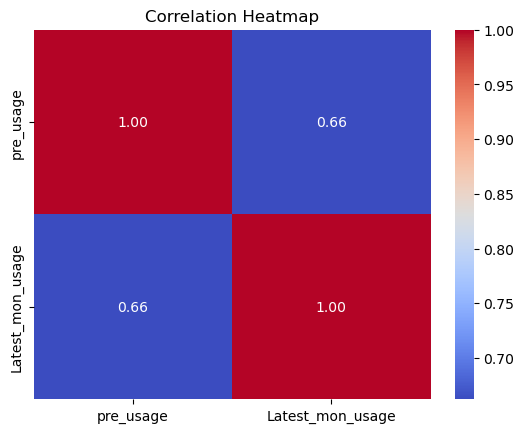

In [63]:
# Compute the correlation matrix for the selected columns
corr_matrix = cus_seg[['pre_usage', 'Latest_mon_usage']].corr()

# Plot heatmap
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Text(0, 0.5, 'Latest_mon_usage')

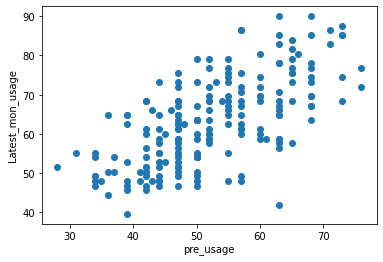

In [49]:
plt.scatter(x =cus_seg['pre_usage'] , y = cus_seg['Latest_mon_usage'])
plt.xlabel(cus_seg['pre_usage'].name)
plt.ylabel(cus_seg['Latest_mon_usage'].name)

In [50]:
# End of the notebook